### importing required libraries

In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

### Data collection from web source using beautiful soup library

In [70]:
## collecting table no 1
res=requests.get('https://www.macrotrends.net/countries/WLD/world/inflation-rate-cpi')
soup=BeautifulSoup(res.content,'lxml')
table=soup.find_all('table')[0]
df1=pd.read_html(str(table))

In [71]:
df1=pd.DataFrame(df1[0])

In [82]:
df1.head()

Similar Country Ranking                   
             Country Name Inflation Rate (%)
0              South Asia              5.69%
1      Sub-Saharan Africa              3.22%
2                   World              1.94%
3           North America              0.98%
4            OECD members              0.74%

In [72]:
df1.shape

(7, 2)

In [207]:
df1.to_csv('countries.csv',index=False)

In [208]:
df_countries=pd.read_csv('countries.csv')

In [209]:
df_countries.head()

,Country Name,Inflation Rate (%)
0,South Asia,5.69%
1,Sub-Saharan Africa,3.22%
2,World,1.94%
3,North America,0.98%
4,OECD members,0.74%


In [210]:
df_countries.dtypes

Country Name          object
Inflation Rate (%)    object
dtype: object

## Data Preprocessing and Exploratory Data Analysis

In [222]:
df_countries.rename(columns={'Inflation Rate (%)':'Inflation_Rate'},inplace=True)
df_countries.rename(columns={'Country Name':'Country_Name'},inplace=True)

In [223]:
df_countries.head(1)

,Country_Name,Inflation_Rate
0,South Asia,5.69


In [217]:
## Remove % from Inflation_Rate feature
df_countries['Inflation_Rate']=df_countries['Inflation_Rate'].str.replace('%','')

In [218]:
df_countries.head(1)

,Country Name,Inflation_Rate
0,South Asia,5.69


In [220]:
## convrting inflation_rate feature into float type
df_countries['Inflation_Rate']=df_countries['Inflation_Rate'].astype('str').astype('float64')

In [221]:
df_countries.dtypes

Country Name       object
Inflation_Rate    float64
dtype: object

In [225]:
## checking inflattion rates of different countries
gr_country=df_countries.groupby('Country_Name')

<Figure size 720x288 with 0 Axes>

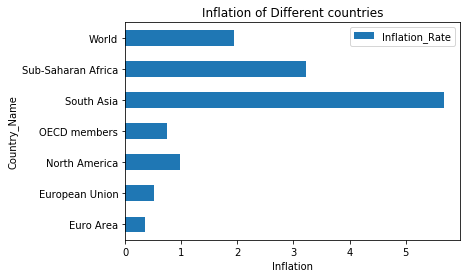

In [231]:
plt.figure(figsize=(10,4))
gr_country.first().plot(kind='barh')
plt.xlabel('Inflation')
plt.title('Inflation of Different countries')
plt.show()

In [122]:
## collecting table no 2
res=requests.get('https://www.macrotrends.net/countries/WLD/world/inflation-rate-cpi')
soup=BeautifulSoup(res.content,'lxml')
table=soup.find_all('table')[1]
df3=pd.read_html(str(table))

In [124]:
df3=pd.DataFrame(df3[0])

In [128]:
df3.head()

World Inflation Rate - Historical Data                                 
                                    Year Inflation Rate (%) Annual Change
0                                   2020              1.94%        -0.21%
1                                   2019              2.15%        -0.27%
2                                   2018              2.42%         0.24%
3                                   2017              2.18%         0.69%
4                                   2016              1.49%         0.06%

In [126]:
## saving the csv file
df3.to_csv('world_inflation_rate1.csv',index=False)

In [137]:
df3=pd.read_csv('world_inflation_rate1.csv')

In [138]:
df3.shape

(40, 3)

### checking for null values

In [139]:
df1.isnull().sum()

Similar Country Ranking  Country Name          0
                         Inflation Rate (%)    0
dtype: int64

In [140]:
df3.isnull().sum()

Year                  0
Inflation Rate (%)    0
Annual Change         0
dtype: int64

In [206]:
df1.head(1)

Similar Country Ranking                   
             Country Name Inflation Rate (%)
0              South Asia              5.69%

In [141]:
df3.columns

Index(['Year', 'Inflation Rate (%)', 'Annual Change'], dtype='object')

In [144]:
df3.dtypes

Year                   int64
Inflation Rate (%)    object
Annual Change         object
dtype: object

In [145]:
df3.head(1)

,Year,Inflation Rate (%),Annual Change
0,2020,1.94%,-0.21%


In [156]:
df3.rename(columns={'Inflation Rate (%)':'Inflation_Rate'},inplace=True)
df3.rename(columns={'Annual Change':'Annual_Change'},inplace=True)

In [157]:
df3.head(1)

,Year,Inflation_Rate,Annual_Change
0,2020,1.94,-0.21%


In [159]:
## remove % in inflation_rate feature
df3['Inflation_Rate']=df3['Inflation_Rate'].str.replace('%','')
df3['Annual_Change']=df3['Annual_Change'].str.replace('%','')

In [160]:
df3.head(1)

,Year,Inflation_Rate,Annual_Change
0,2020,1.94,-0.21


In [170]:
## converting Inflation_Rate,Annual_Change datatypes into int types
df3['Inflation_Rate']=df3['Inflation_Rate'].astype('str').astype('float')
df3['Annual_Change']=df3['Annual_Change'].astype('str').astype('float')

In [172]:
## checking the datatypes
df3.dtypes

Year                int64
Inflation_Rate    float64
Annual_Change     float64
dtype: object

## Line plot

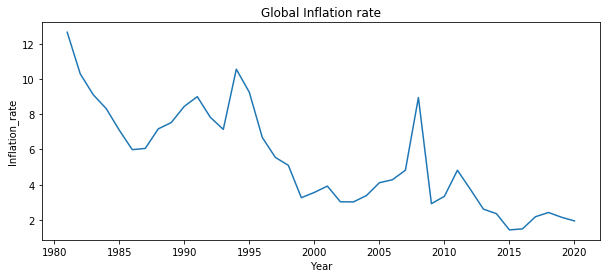

In [177]:
plt.figure(figsize=(10,4))
plt.plot(df3['Year'],df3['Inflation_Rate'])
plt.xlabel('Year')
plt.ylabel('Inflation_rate')
plt.title('Global Inflation rate')
plt.show()

In [191]:
grp_year=df3.groupby('Year')

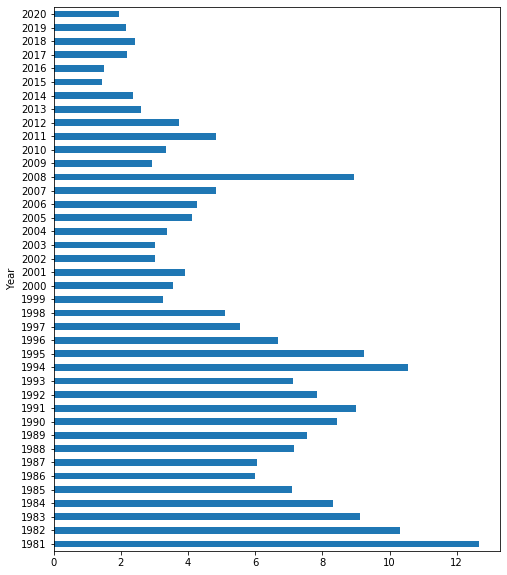

In [203]:
grp_year.first()['Inflation_Rate'].plot(kind='barh',figsize=(8,10))
plt.show()

In [205]:
df3[df3['Year']==1981]

,Year,Inflation_Rate,Annual_Change
39,1981,12.66,-2.37


### Building machine learning model

In [234]:
## splitting dependent variable and independent variable
X=df3.drop('Inflation_Rate',axis=1)
y=df3['Inflation_Rate']

In [235]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Linear regression

In [236]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [237]:
y_pred=lin_reg.predict(X_test)
y_pred

array([2.36649237, 4.41097633, 2.63301588, 5.6049631 , 2.41265762,
       8.73172456, 2.29958922, 7.80412628, 8.68617137, 1.51919048,
       8.68814255, 8.41733465])

In [238]:
from sklearn.metrics import r2_score
r2_score_lin_reg=r2_score(y_test,y_pred)
r2_score_lin_reg

0.884625013230746

## KNN

In [239]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [240]:
y_pred=knn.predict(X_test)
y_pred

array([2.592, 4.812, 2.972, 3.25 , 2.872, 7.868, 2.592, 7.402, 7.026,
       2.592, 7.868, 7.868])

In [242]:
r2_score_knn=r2_score(y_test,y_pred)
r2_score_knn

0.884457418258704

## Randomforest

In [243]:
from sklearn.ensemble import RandomForestRegressor
ran_for=RandomForestRegressor()
ran_for.fit(X_train,y_train)

RandomForestRegressor()

In [244]:
y_pred=ran_for.predict(X_test)
y_pred

array([ 2.6587,  3.696 ,  3.192 ,  3.5045,  2.3125,  9.9587,  2.2367,
        7.7557,  7.0193,  2.2646,  7.0114, 10.3699])

In [245]:
r2_score_ran_for=r2_score(y_test,y_pred)
r2_score_ran_for

0.9407189288188755

## Gradient boost Regressor

In [246]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boo=GradientBoostingRegressor()
grad_boo.fit(X_train,y_train)

GradientBoostingRegressor()

In [247]:
y_pred=grad_boo.predict(X_test)
y_pred

array([ 3.13193948,  3.77367425,  2.94979932,  3.51440862,  1.98285   ,
       10.91562711,  1.76730046,  7.46478536,  7.54454944,  1.99030849,
        6.2368989 , 12.65285747])

In [248]:
r2_score_grad_boo=r2_score(y_test,y_pred)
r2_score_grad_boo

0.8307917410658815

## visualization of scores

In [261]:
model={'linear_regression':r2_score_lin_reg,'KNN':r2_score_knn,'Random_Forest':r2_score_ran_for,'Gradient_boosting':r2_score_grad_boo}
df_scores=pd.DataFrame(data=model.values(),index=model.keys(),columns=['r2_score'])

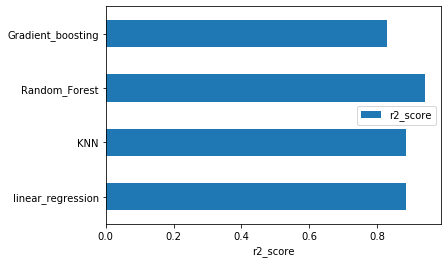

In [265]:
df_scores.plot(kind='barh')
plt.xlabel('r2_score')
plt.show()